# Mathematical Underpinnings - Lab 2

## Task 1

In [27]:
import numpy as np
import matplotlib.pyplot as plt

### a)

$R(a,a^*) = \mathbb{E} \mathcal{L}(f(X), Y) = \mathbb{E}(aX - Y)^2 = ...$,

In our task we know $a^* = 1$.

In [28]:
def population_risk(a, sigma_squared):
    return a**2 + sigma_squared**2 + 1 - 2*a

### b)

In [29]:
# sampling
n = 50
sigma_squared = 1
X = np.random.randn(n)
eps = np.sqrt(sigma_squared)*np.random.randn(n)
Y = X + eps

Empirical risk: $\frac{1}{n} \sum_{i=1}^n (ax_i - y_i)^2$

In [30]:
def empirical_risk(a, x, y):
    n = len(X)
    return 1/n * sum((a*x - y)**2)

### c)

In [31]:
a_grid = np.arange(1/2,1.5, 0.01)
R_population = [population_risk(a, sigma_squared) for a in a_grid]
R_empirical = [empirical_risk(a, X, Y) for a in a_grid]

In [32]:
R_pop_min = min(R_population)
R_emp_min = min(R_empirical)
R_pop_a_min = a_grid[np.where(R_population == R_pop_min)][0]
R_emp_a_min = a_grid[np.where(R_empirical == R_emp_min)][0]
R_pop_empamin = population_risk(R_emp_a_min, sigma_squared)

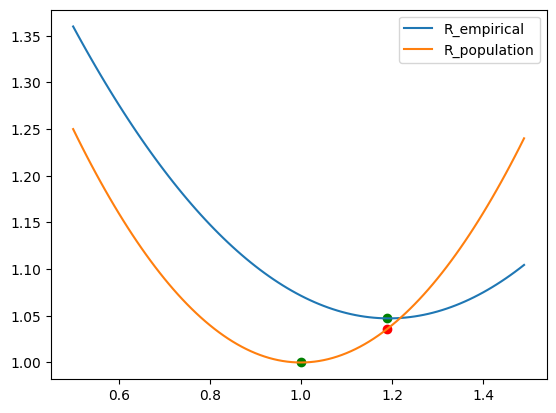

In [33]:
plt.plot(a_grid, R_empirical, label='R_empirical')
plt.plot(a_grid, R_population, label='R_population')
plt.scatter(R_pop_a_min, R_pop_min, c="green")
plt.scatter(R_emp_a_min, R_emp_min, c="green")
plt.scatter(R_emp_a_min, R_pop_empamin, c="red")
plt.legend()

### d)

Excess risk: $$E(\hat a, a^*) =R(\hat a, a^*) - \textrm{inf}_{a \in A_0} R(a, a^*)$$

In [34]:
# excess risk
R_excess = R_pop_empamin - R_pop_min
R_excess

0.03610000000000024

In [37]:
L = 200
n = 50
R_excess_n = []
for n in [50,100,200,500]:
    R_excess = 0
    for l in range(L):
        X = np.random.randn(n)
        eps = np.sqrt(sigma_squared)*np.random.randn(n)
        Y = X + eps

        a_grid = np.arange(1/2,1.5, 0.01)
        R_population = [population_risk(a, sigma_squared) for a in a_grid]
        R_empirical = [empirical_risk(a, X, Y) for a in a_grid]

        R_pop_min = min(R_population)
        R_emp_min = min(R_empirical)
        R_pop_a_min = a_grid[np.where(R_population == R_pop_min)][0]
        R_emp_a_min = a_grid[np.where(R_empirical == R_emp_min)][0]
        R_pop_empamin = population_risk(R_emp_a_min, sigma_squared)
        R_excess += (R_pop_empamin - R_pop_min)/L
    R_excess_n.append(R_excess)

In [38]:
R_excess_n

[0.025097000000000067,
 0.010028500000000025,
 0.00447950000000001,
 0.0023755000000000195]

### Expectedly it decreases with increasing n

# e) not finished

In [23]:
mu_x = 2
sigma_x = 2
a_0 = 1/2
b_0 = 3

In [24]:
def population_risk(a, b sigma_squared):
    return (a - a_0)**2*(mu_x**2 + sigma_x**2) + (b - b_0)**2 * sigma_squared - 2*(b - b_0)*(a - a_0)* mu_x

In [25]:
# sampling
n = 50
sigma_squared = 1
X = mu_x + sigma_x*np.random.randn(n)
eps = np.sqrt(sigma_squared)*np.random.randn(n)
Y = a_0*X + b_0 + eps